# Amazon Sale Report

By Kaamil Nailal Muna

#### Problem Statement
- The Amazon Sale Report dataset provides detailed information about sales transactions on the Amazon platform, including order fulfillment details, sales channels, and courier-related information.
- The goal of this project is to analyze the data and extract valuable insights that can contribute to improving the efficiency and effectiveness of the sales operations on the Amazon platform.
- Specific questions we aim to answer include: What is the distribution of sales across different sales channels and categories? How does the fulfillment process impact sales performance? Are there specific regions or countries where sales are particularly high or low? What is the status of courier services and how does it relate to order fulfillment and customer satisfaction?
- By addressing these questions, we aim to provide recommendations to optimize sales channels, streamline the fulfillment process, and enhance the overall performance of sales on the Amazon platform. This analysis can help the company make informed decisions to improve customer satisfaction, increase sales, and maximize operational efficiency.

#### Assumptions
- Representativeness of Data: The Amazon Sale Report dataset is assumed to provide a representative sample of all sales transactions conducted on the Amazon platform during the specified time period.
- Time Period Coverage: The dataset is assumed to cover a sufficient time period to allow for the identification of trends, patterns, and seasonality in sales. This assumption implies that the dataset provides a comprehensive overview of Amazon sales over the designated timeframe.
- Absence of Outliers or Anomalies: The Amazon Sale Report dataset is assumed to be free from significant outliers or anomalies that could potentially distort the results of any analysis. This assumption is important for ensuring that the insights derived from the data are representative of the general sales trends on the platform.

#### Research Question
- What is the distribution of sales across different product categories on Amazon?
- Is there a correlation between the size of products and the quantity sold on Amazon?
- How does the status of courier services impact the delivery and sales process?
- How does the product distribution state and shipping status?
- How do sales vary across different ship-city on the Amazon platform?

In [51]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.options.display.float_format = '{:,.0f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("Amazon Sale Report.csv", encoding = 'unicode_escape')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,648,MUMBAI,MAHARASHTRA,"400,081",IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406,BENGALURU,KARNATAKA,"560,085",IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329,NAVI MUMBAI,MAHARASHTRA,"410,210",IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753,PUDUCHERRY,PUDUCHERRY,"605,008",IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574,CHENNAI,TAMIL NADU,"600,073",IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517,HYDERABAD,TELANGANA,"500,013",IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999,GURUGRAM,HARYANA,"122,004",IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690,HYDERABAD,TELANGANA,"500,049",IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,"1,199",Halol,Gujarat,"389,350",IN,False,NaN,NaN,NaN


In [53]:
df.shape

(128976, 21)

In [54]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,648,MUMBAI,MAHARASHTRA,"400,081",IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406,BENGALURU,KARNATAKA,"560,085",IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329,NAVI MUMBAI,MAHARASHTRA,"410,210",IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753,PUDUCHERRY,PUDUCHERRY,"605,008",IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574,CHENNAI,TAMIL NADU,"600,073",IN,False,NaN,NaN,NaN


In [55]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517,HYDERABAD,TELANGANA,"500,013",IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999,GURUGRAM,HARYANA,"122,004",IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690,HYDERABAD,TELANGANA,"500,049",IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,"1,199",Halol,Gujarat,"389,350",IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696,Raipur,CHHATTISGARH,"492,014",IN,False,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [57]:
df.drop(['New', 'PendingS'], axis = 1, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [59]:
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [60]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [61]:
df.shape

(128976, 19)

In [62]:
# cleaning data
df.dropna(inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

In [64]:
df.duplicated().any()

True

In [65]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [66]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [67]:
df['ship-postal-code'].dtype

dtype('int32')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  int32  
 16  ship-cou

In [69]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df['Date']

0        2022-04-30
1        2022-04-30
3        2022-04-30
7        2022-04-30
12       2022-04-30
            ...    
128875   2022-06-01
128876   2022-06-01
128888   2022-05-31
128891   2022-05-31
128892   2022-05-31
Name: Date, Length: 37514, dtype: datetime64[ns]

In [70]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [71]:
df.rename(columns={'Qty' : 'Quantity'}, inplace=True)

In [72]:
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,"37,514",37514,"37,514","37,514","37,514"
mean,"60,954",2022-05-11 07:56:47.303939840,1,647,"463,292"
min,0,2022-03-31 00:00:00,0,0,"110,001"
25%,"27,235",2022-04-20 00:00:00,1,458,"370,465"
50%,"63,470",2022-05-09 00:00:00,1,629,"500,019"
75%,"91,791",2022-06-01 00:00:00,1,771,"600,042"
max,"128,891",2022-06-29 00:00:00,5,"5,495","989,898"
std,"36,845",NaN,0,280,"194,550"


In [73]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [74]:
 df[['Quantity', 'Amount']].describe()

,Quantity,Amount
count,"37,514","37,514"
mean,1,647
std,0,280
min,0,0
25%,1,458
50%,1,629
75%,1,771
max,5,"5,495"


## Exploratory Data Analysis

In [75]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

### Courier Status

<function matplotlib.pyplot.show(close=None, block=None)>

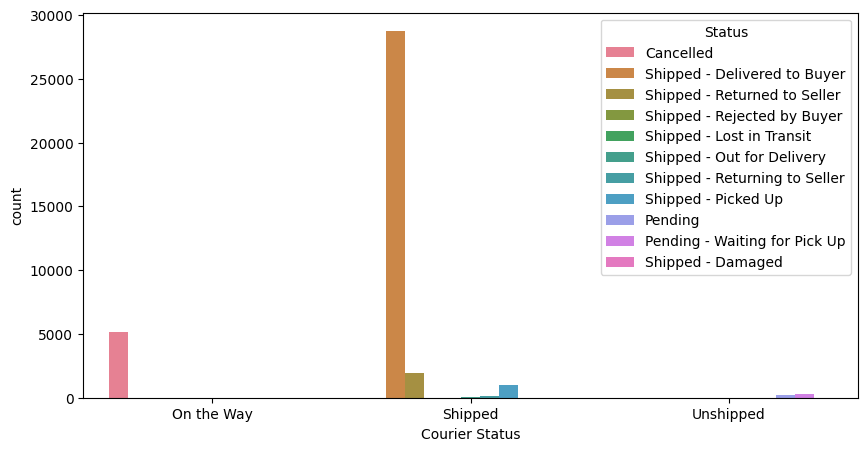

In [76]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(data = df, x='Courier Status', hue='Status', palette='husl')

plt.show

<Axes: >

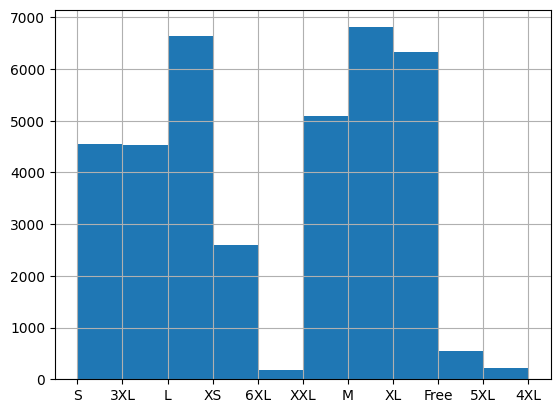

In [77]:
df['Size'].hist()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Quantity            37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [79]:
df['Category'] = pd.Categorical(df['Category'])
print(df.dtypes)

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                    category
Size                          object
Courier Status                object
Quantity                       int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int32
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object


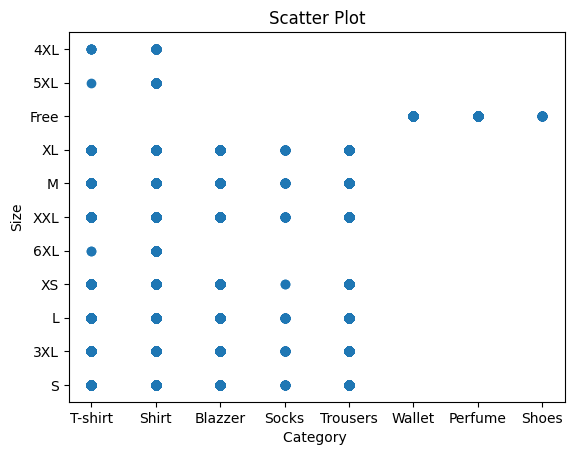

In [80]:
# Prepare data for scatter plot
x_data = df['Category']  
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.show()

## Research Answer

#### 1. What is the distribution of sales across different product categories on Amazon?

In [81]:
sales_basedon_category = df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_basedon_category


,Category,Amount
5,T-shirt,"11,564,207"
2,Shirt,"6,121,653"
0,Blazzer,"4,940,322"
6,Trousers,"1,214,335"
1,Perfume,"207,673"
7,Wallet,"117,047"
4,Socks,"64,238"
3,Shoes,"25,350"


Text(0, 0.5, 'Total Sales (Amount)')

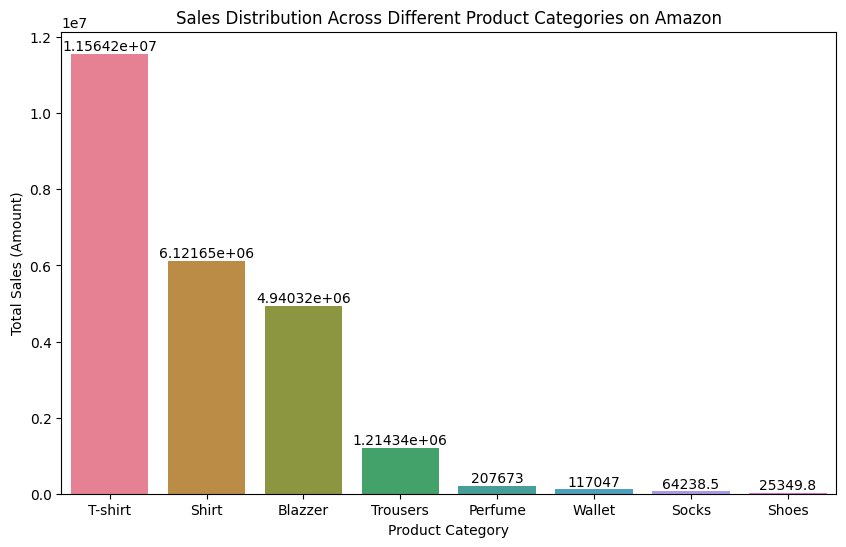

In [82]:
plt.figure(figsize=(10, 6))
sales = sns.barplot(x='Category', y='Amount', ci = None, data = sales_basedon_category , palette = 'husl', order=sales_basedon_category['Category'])
for bars in sales.containers:
    sales.bar_label(bars)
plt.title('Sales Distribution Across Different Product Categories on Amazon')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (Amount)')

Based on graphic above, T-Shirt has highest sales

#### 2. Is there a correlation between the size of products and the quantity sold on Amazon?

In [83]:
size_qty = df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
size_qty

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


Text(0.5, 1.0, 'Product size based on Quantity on Amazon')

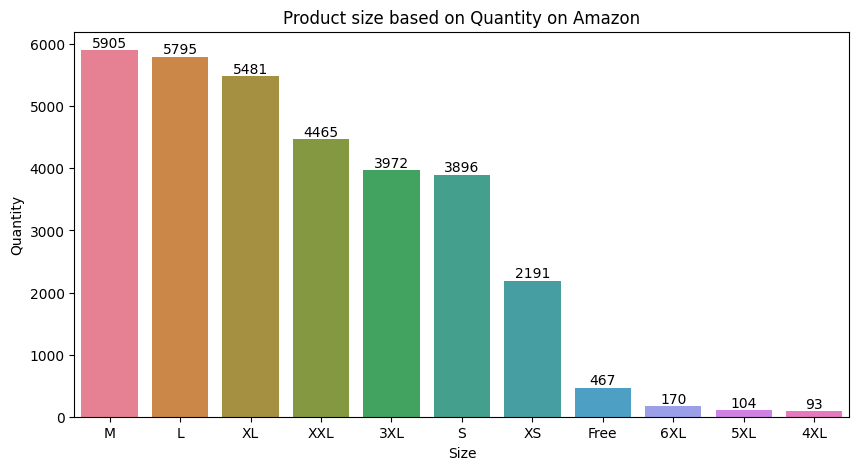

In [95]:
plt.figure(figsize=(10, 5))
size_qty_plot = sns.barplot(x='Size', y='Quantity', data=size_qty, palette='husl')
for bars in size_qty_plot.containers:
    size_qty_plot.bar_label(bars)
plt.title('Product size based on Quantity on Amazon')

So, Size M has the highest quantity than other size

#### 3. How does the status of courier services impact the delivery and sales process?

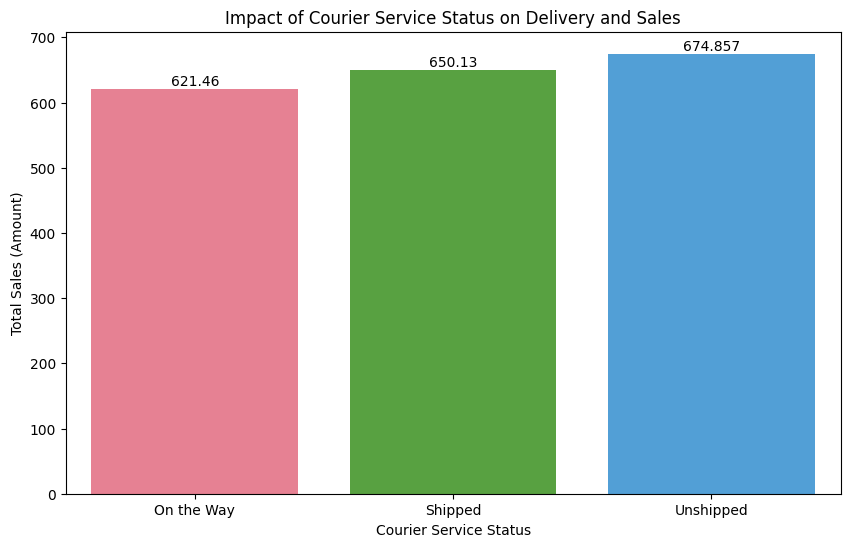

In [ ]:
plt.figure(figsize=(10, 6))
courier_impact = sns.barplot(x='Courier Status', y='Amount', data=df, ci=None, palette='husl')
for bars in courier_impact.containers:
    courier_impact.bar_label(bars)
plt.title('Impact of Courier Service Status on Delivery and Sales')
plt.xlabel('Courier Service Status')
plt.ylabel('Total Sales (Amount)')
plt.show()

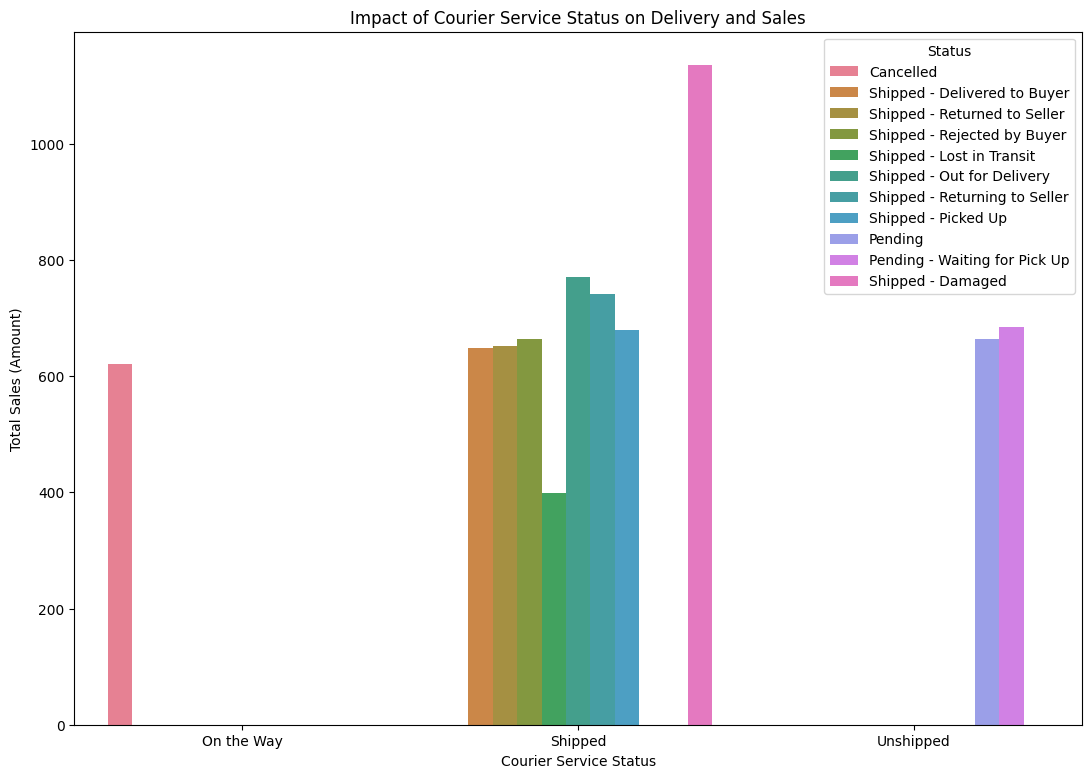

In [ ]:
plt.figure(figsize=(13, 9))
courier_impact = sns.barplot(x='Courier Status', y='Amount', hue='Status', data=df, ci=None, palette='husl')
plt.title('Impact of Courier Service Status on Delivery and Sales')
plt.xlabel('Courier Service Status')
plt.ylabel('Total Sales (Amount)')
plt.show()

It can be seen that the largest amount is goods that were shipped but had damage

#### 4. How does the product distribution state and shipping status?

In [ ]:
state_counts = df['ship-state'].value_counts().reset_index()
state_counts.columns = ['ship-state', 'Count']
print(state_counts)

                ship-state  Count
0              MAHARASHTRA   6236
1                KARNATAKA   4550
2            UTTAR PRADESH   3298
3               TAMIL NADU   3167
4                TELANGANA   3136
5                   KERALA   2213
6                    DELHI   1955
7              WEST BENGAL   1653
8           ANDHRA PRADESH   1621
9                  Gujarat   1382
10                 HARYANA   1226
11               RAJASTHAN    870
12          MADHYA PRADESH    808
13                   BIHAR    656
14                  ODISHA    604
15                  PUNJAB    588
16                   ASSAM    540
17             UTTARAKHAND    500
18               JHARKHAND    468
19                     GOA    316
20            CHHATTISGARH    310
21        HIMACHAL PRADESH    277
22         JAMMU & KASHMIR    232
23              CHANDIGARH    112
24              PUDUCHERRY    102
25                 MANIPUR    101
26       ANDAMAN & NICOBAR     91
27                NAGALAND     69
28            

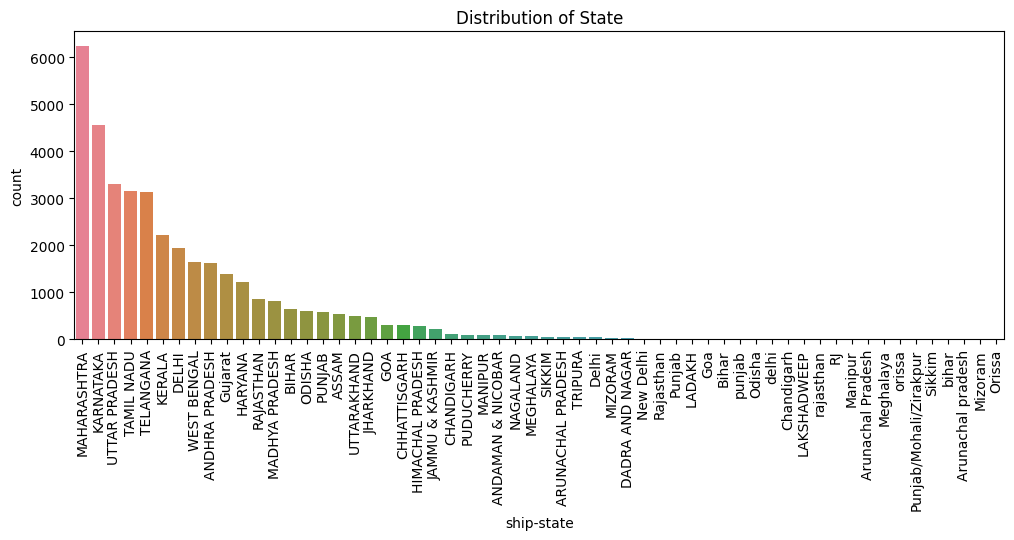

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='ship-state', order=df['ship-state'].value_counts().index, palette ='husl')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

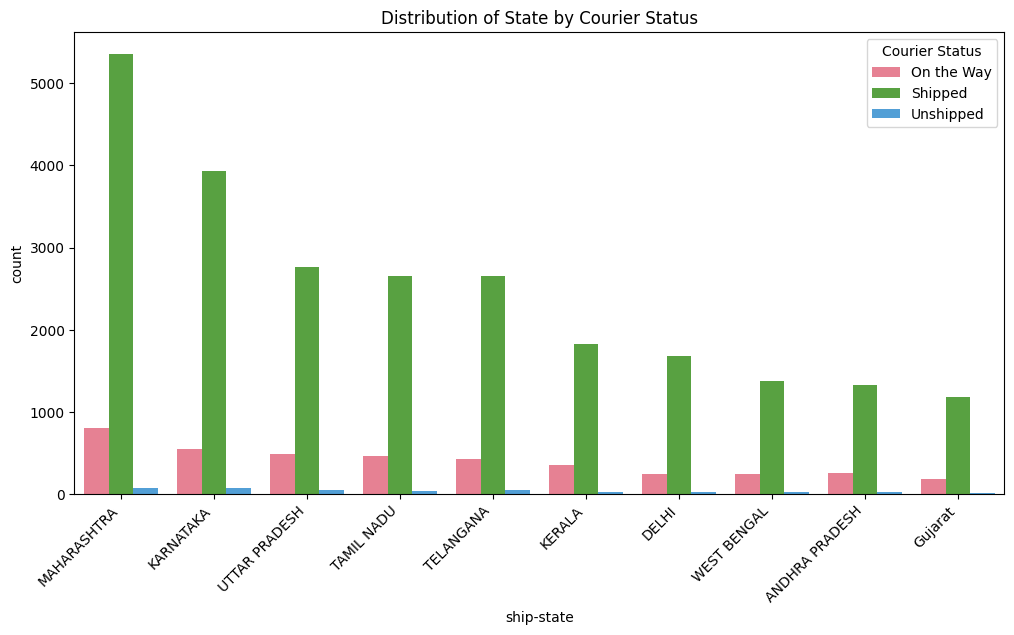

In [96]:
top_10_state = df['ship-state'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], hue = 'Courier Status', order=top_10_state.index, x='ship-state', palette='husl')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State by Courier Status')
plt.xticks(rotation=45, ha ='right')
plt.show()

It can be seen in the graph above that the most ship-states are in the state of Maharashtra

#### 5. How do sales vary across different ship-city on the Amazon platform?

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
top_cities = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).index

df_top_10_cities = df[df['ship-city'].isin(top_cities)]
df_top_10_cities

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,648,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
14,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,L,Shipped,1,INR,771,MUMBAI,MAHARASHTRA,400053,IN,False,Easy Ship
35,35,402-2764952-1492318,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1,INR,499,LUCKNOW,UTTAR PRADESH,226016,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128852,128851,404-9228208-9407529,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399,BENGALURU,KARNATAKA,560024,IN,False,Easy Ship
128857,128856,171-6306655-3626748,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1,INR,544,NEW DELHI,DELHI,110060,IN,False,Easy Ship
128860,128859,407-8043662-8470731,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,459,HYDERABAD,TELANGANA,500086,IN,False,Easy Ship
128861,128860,407-8043662-8470731,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,487,HYDERABAD,TELANGANA,500086,IN,False,Easy Ship


<Figure size 1000x500 with 0 Axes>

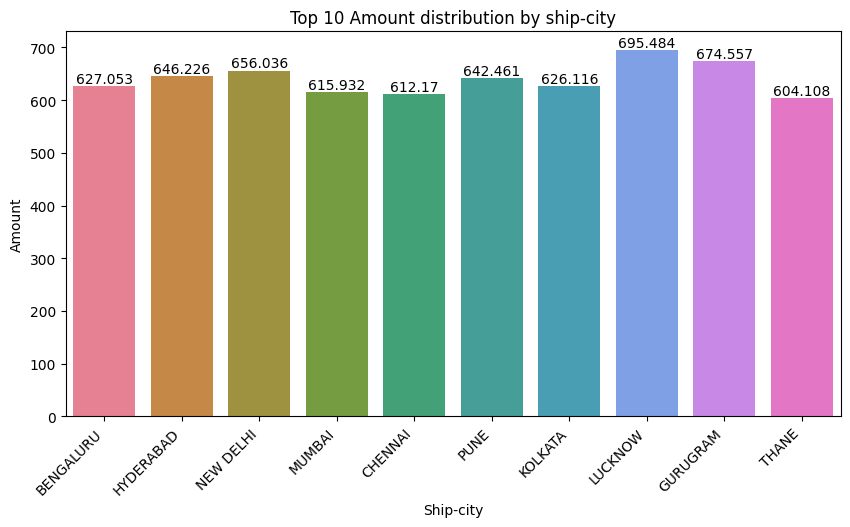

In [ ]:
plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
ship_city_amount = sns.barplot(x='ship-city', y='Amount', data=df_top_10_cities, palette='husl', order=top_cities, ci=None)
for bars in ship_city_amount.containers:
    ship_city_amount.bar_label(bars)
plt.xlabel('Ship-city')
plt.ylabel('Amount')
plt.title('Top 10 Amount distribution by ship-city')
plt.xticks(rotation=45, ha ='right')
plt.show()

The largest sales were in the city of Lucknow, namely 695,484

## The Result

1. Sales distribution in the Amazon product category is still dominated by clothing, with T-shirts being the highest. Meanwhile, other complementary fashion items such as shoes, socks and wallets are still minimal
2. The correlation between size and quantity means that most consumers buy clothes in sizes M, L and XL. These clothes are usually standard consumer sizes.
3. Courier status affects existing sales, as generated by the highest sales graph by items that have not been delivered. Then, when the courier status has been sent, most of the goods sold are damaged or damaged.
4. Distribution state affects sales the most in Maharashtra and the least in Orissa. Apart from that, it can be noticed that the more counts in the distribution state, the more products are shipped and on the way. The good thing is that even though it is sent to a distribution state with many products, there are very few unshipped products. This shows that Amazon's performance in sending goods is good. But not with the security conditions of the goods.
5. The ship-city sales graph shows that the Top 10 is spread very evenly, namely above 600k, with Lucknow the highest, namely 695,484

## Suggestion

1. Based on the results of data analysis, sales of complementary fashion products still need to be higher than clothing sales. This shows that Amazon can potentially increase sales of complementary fashion products. Amazon can carry out various strategies to strengthen sales of complementary fashion products, such as:
- Increase promotions for complementary fashion products like shoes, socks and wallets. Amazon can carry out promotions through various media, such as advertising, social media, and customer loyalty programs.
- Collaborate with influencers or celebrities to promote complementary fashion products. This helps expand the existing target market.
- Develop complementary fashion products with more attractive and innovative designs. Amazon can work with professional designers to create complementary fashion products that are unique and attractive to consumers.
2. Based on the data analysis results, most goods sold were damaged. This shows that Amazon needs to improve the quality of its delivery services. Amazon can carry out various strategies to improve the quality of its goods delivery services, such as:
- Improve training for couriers to handle goods more carefully. Couriers need to be trained to understand how to handle goods adequately so they are not damaged during delivery.
- Implement a goods inspection system before being sent to consumers. This inspection system can help Amazon detect damaged goods before they are sent to consumers.
- Provide compensation to consumers who receive damaged goods. This compensation can be in the form of a refund or replacement of goods.
3. Based on the results of data analysis, sales in the Maharashtra and Lucknow regions have high potential. Amazon can focus on these regions to increase its sales. Amazon can carry out various strategies to focus on areas with high sales potential, such as:
- Increasing promotions in these cities. Amazon can carry out promotions through various media, such as advertising, social media, and customer loyalty programs.
- Collaborate with local partners to open physical stores in these cities. Physical stores can help Amazon reach consumers more directly.
- Develop products that suit consumer needs in these cities. Amazon can research to understand consumer needs in these cities.

Besides the recommendations above, Amazon can conduct more in-depth data analysis for specific insights. For example, Amazon can analyze data based on product category, size, consumer type, etc. With deeper data analysis, Amazon can make more targeted business decisions. Like:
- Data analysis by product category: Amazon can analyze data to determine the most popular product categories in each region. With this analysis, Amazon can focus on the most popular product categories to increase its sales.
- Data analysis by product size: Amazon can analyze the data to determine the most popular product sizes in each region. With this analysis, Amazon can ensure that the products available in each area meet consumer needs.
- Analyze data by consumer type: Amazon can analyze data to determine what kinds of consumers often buy certain products. With this analysis, Amazon can adjust its marketing strategy to target the correct type of consumers.